<a href="https://colab.research.google.com/github/ryan840919/STAS-Detection/blob/main/Prediction_and_Ground_true.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Generate the images labeled by prediction result and ground true.

In [2]:
import os
import cv2
from google.colab.patches import cv2_imshow

def P_G(test_name):
  # make a file of the recent test_name to prepare to store the labeled images about to generate.
  os.makedirs(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}')

  filename = os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/yolov5/yolov5/runs/val/{test_name}/labels')
  numlist = []
  for fil in filename:
    name = fil.split('.')
    numlist.append(int(name[0]))

  for num in numlist:
    # open and read the labels.txt files generated by the recent test.
    with open(f'/content/gdrive/MyDrive/AI競賽_運算/yolov5/yolov5/runs/val/{test_name}/labels/{num:08}.txt','r') as R:
      corlis = []
      for line in R.readlines():
        word = line.split(' ')
        xmin = round(float(word[1])*1716-float(word[3])*1716/2)
        ymin = round(float(word[2])*942-float(word[4])*942/2)
        xmax = round(float(word[1])*1716+float(word[3])*1716/2)
        ymax = round(float(word[2])*942+float(word[4])*942/2)
        score = float(word[5])
        cor = [xmin,ymax,xmax,ymin,score]
        corlis.append(cor)

    # open and read the labels.txt files that are initially given by the val set (ground true).
    with open(f'/content/gdrive/MyDrive/AI競賽_運算/data/STAS_YOLOv5_PS/labels/val/{num:08}.txt','r') as RL:
      corlisL = []
      for line in RL.readlines():
        wordL = line.split(' ')
        xminL = round(float(wordL[1])*1716-float(wordL[3])*1716/2)
        yminL = round(float(wordL[2])*942-float(wordL[4])*942/2)
        xmaxL = round(float(wordL[1])*1716+float(wordL[3])*1716/2)
        ymaxL = round(float(wordL[2])*942+float(wordL[4])*942/2)
        corL = [xminL,ymaxL,xmaxL,yminL]
        corlisL.append(corL)

    # read the val image files that are initially splited
    img = cv2.imread(f'/content/gdrive/MyDrive/AI競賽_運算/data/STAS_YOLOv5_PS/images/val/{num:08}.jpg')
    for cor in corlis:
      cv2.rectangle(img, (cor[0],cor[1]), (cor[2],cor[3]),(0,0,255),2)
      cv2.putText(img, f'{cor[4]}',(cor[0],cor[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
    for corL in corlisL:
      cv2.rectangle(img, (corL[0],corL[1]), (corL[2],corL[3]),(0,255,0),2)
    
    # write the new labeled images that are generated by the recent test to the file.
    cv2.imwrite(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}/{num:08}_labeled.jpg',img)

In [ ]:
P_G('test_for_label')

In [3]:
P_G('test_for_label_augmentation')

## Generate the images that are prediction result but not ground true.

In [4]:
def P_not_G(test_name):  
  os.makedirs(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G')

  filename = os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/yolov5/yolov5/runs/val/{test_name}/labels')
  numlist = []
  for fil in filename:
    name = fil.split('.')
    numlist.append(int(name[0]))

  for n in numlist:
    im = cv2.imread(f'/content/gdrive/MyDrive/AI競賽_運算/data/STAS_YOLOv5_PS/images/val/{n:08}.jpg')
    with open(f'/content/gdrive/MyDrive/AI競賽_運算/data/STAS_YOLOv5_PS/labels/val/{n:08}.txt','r') as RL:
      corlisL = []
      for line in RL.readlines():
        wordL = line.split(' ')
        xminL = round(float(wordL[1])*1716-float(wordL[3])*1716/2)
        yminL = round(float(wordL[2])*942-float(wordL[4])*942/2)
        xmaxL = round(float(wordL[1])*1716+float(wordL[3])*1716/2)
        ymaxL = round(float(wordL[2])*942+float(wordL[4])*942/2)
        corL = [xminL,ymaxL,xmaxL,yminL]
        corlisL.append(corL)

    with open(f'/content/gdrive/MyDrive/AI競賽_運算/yolov5/yolov5/runs/val/{test_name}/labels/{n:08}.txt','r') as R:
      corlis = []
      for line in R.readlines():
        word = line.split(' ')
        xcen = round(float(word[1])*1716)
        ycen = round(float(word[2])*942)
        xminL = round(float(word[1])*1716-float(word[3])*1716/2)
        yminL = round(float(word[2])*942-float(word[4])*942/2)
        xmaxL = round(float(word[1])*1716+float(word[3])*1716/2)
        ymaxL = round(float(word[2])*942+float(word[4])*942/2)
        score = float(word[5])
        cor = [xcen,ycen,xminL,ymaxL,xmaxL,yminL,score]
        corlis.append(cor)

    count = 0
    for cor in corlis:
      if not any(corL[0]<=cor[0]<=corL[2] and corL[3]<=cor[1]<=corL[1] for corL in corlisL):
        count += 1
        pim = im[cor[5]:cor[3],cor[2]:cor[4]]
        cv2.imwrite(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G/{n:08}_{count}.jpg',pim)
        with open(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G/{n:08}_{count}.txt','w') as S:
          S.write(f'{cor[6]}')

In [ ]:
P_not_G('test_for_label')

In [5]:
P_not_G('test_for_label_augmentation')

## Generate the images that are ground true but not be predicted.

In [6]:
def G_not_P(test_name):  
  os.makedirs(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_G_not_P')

  filename = os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/yolov5/yolov5/runs/val/{test_name}/labels')
  numlist = []
  for fil in filename:
    name = fil.split('.')
    numlist.append(int(name[0]))

  for n in numlist:
    im = cv2.imread(f'/content/gdrive/MyDrive/AI競賽_運算/data/STAS_YOLOv5_PS/images/val/{n:08}.jpg')
    with open(f'/content/gdrive/MyDrive/AI競賽_運算/data/STAS_YOLOv5_PS/labels/val/{n:08}.txt','r') as RL:
      corlisL = []
      for line in RL.readlines():
        wordL = line.split(' ')
        xcenL = round(float(wordL[1])*1716)
        ycenL = round(float(wordL[2])*942)
        xminL = round(float(wordL[1])*1716-float(wordL[3])*1716/2)
        yminL = round(float(wordL[2])*942-float(wordL[4])*942/2)
        xmaxL = round(float(wordL[1])*1716+float(wordL[3])*1716/2)
        ymaxL = round(float(wordL[2])*942+float(wordL[4])*942/2)
        corL = [xcenL,ycenL,xminL,ymaxL,xmaxL,yminL]
        corlisL.append(corL)

    with open(f'/content/gdrive/MyDrive/AI競賽_運算/yolov5/yolov5/runs/val/{test_name}/labels/{n:08}.txt','r') as R:
      corlis = []
      for line in R.readlines():
        word = line.split(' ')
        xminL = round(float(word[1])*1716-float(word[3])*1716/2)
        yminL = round(float(word[2])*942-float(word[4])*942/2)
        xmaxL = round(float(word[1])*1716+float(word[3])*1716/2)
        ymaxL = round(float(word[2])*942+float(word[4])*942/2)
        cor = [xminL,ymaxL,xmaxL,yminL]
        corlis.append(cor)

    count = 0
    for corL in corlisL:
      if not any(cor[0]<=corL[0]<=cor[2] and cor[3]<=corL[1]<=cor[1] for cor in corlis):
        count += 1
        pim = im[corL[5]:corL[3],corL[2]:corL[4]]
        cv2.imwrite(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_G_not_P/{n:08}_{count}.jpg',pim)

In [ ]:
G_not_P('test_for_label')

In [7]:
G_not_P('test_for_label_augmentation')

## Anaylize the images.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def Statistics_P_not_G(test_name):
  H = []
  W = []
  S = []
  B = []
  G = []
  R = []

  num = len(os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G'))

  for i in os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G'):
    if i.split('.')[1] == 'jpg':
      img = cv2.imread(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G/{i}')
      H.append(img.shape[0])
      W.append(img.shape[1])
      B.append(img[:,:,0].tolist())
      G.append(img[:,:,1].tolist())
      R.append(img[:,:,2].tolist())
    if i.split('.')[1] == 'txt':
      with open(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_P_not_G/{i}') as s:
        score = s.read()
        S.append(score)

  B = [items for item in B for items in item]
  B = [items for item in B for items in item]
  G = [items for item in G for items in item]
  G = [items for item in G for items in item]
  R = [items for item in R for items in item]
  R = [items for item in R for items in item]

  print(f'The number of P_not_G is {num}')
  fig,axes = plt.subplots(2,3,figsize=(40,10)) 
  sns.histplot(ax = axes[0,0],x=H,discrete=True).set(title='Height')
  sns.histplot(ax = axes[0,1],x=W,discrete=True).set(title='Width')
  S.sort()
  sns.stripplot(ax = axes[0,2],data=S).set(title='Probability')
  sns.histplot(ax = axes[1,0],x=B,discrete=True).set(title='Biue')
  sns.histplot(ax = axes[1,1],x=G,discrete=True).set(title='Green')
  sns.histplot(ax = axes[1,2],x=R,discrete=True).set(title='Red')

The number of P_not_G is 106


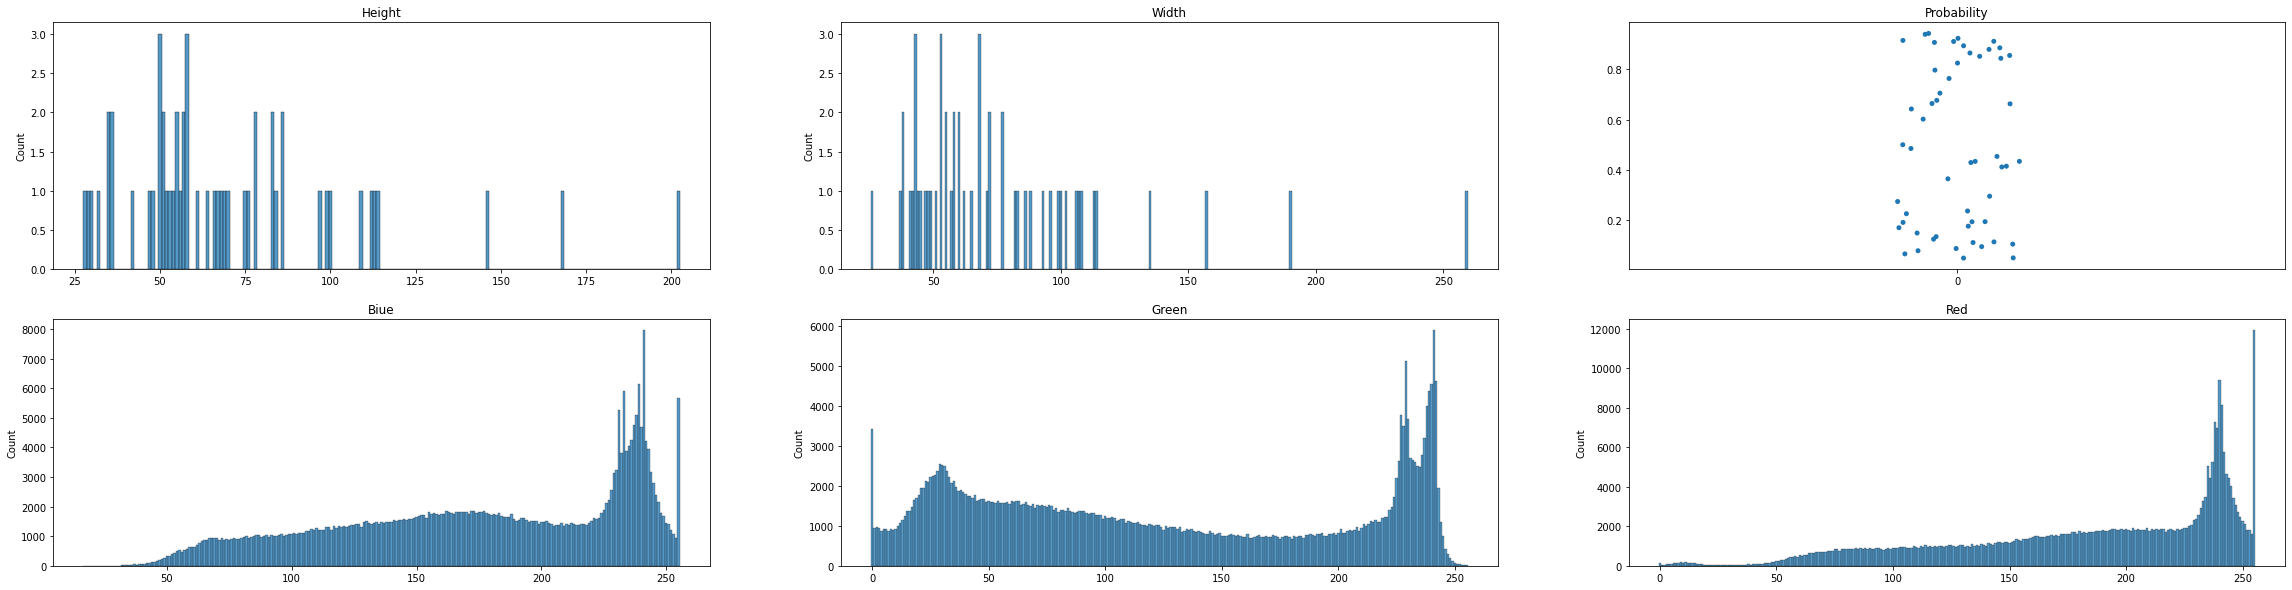

In [17]:
Statistics_P_not_G('test_for_label')

The number of P_not_G is 142


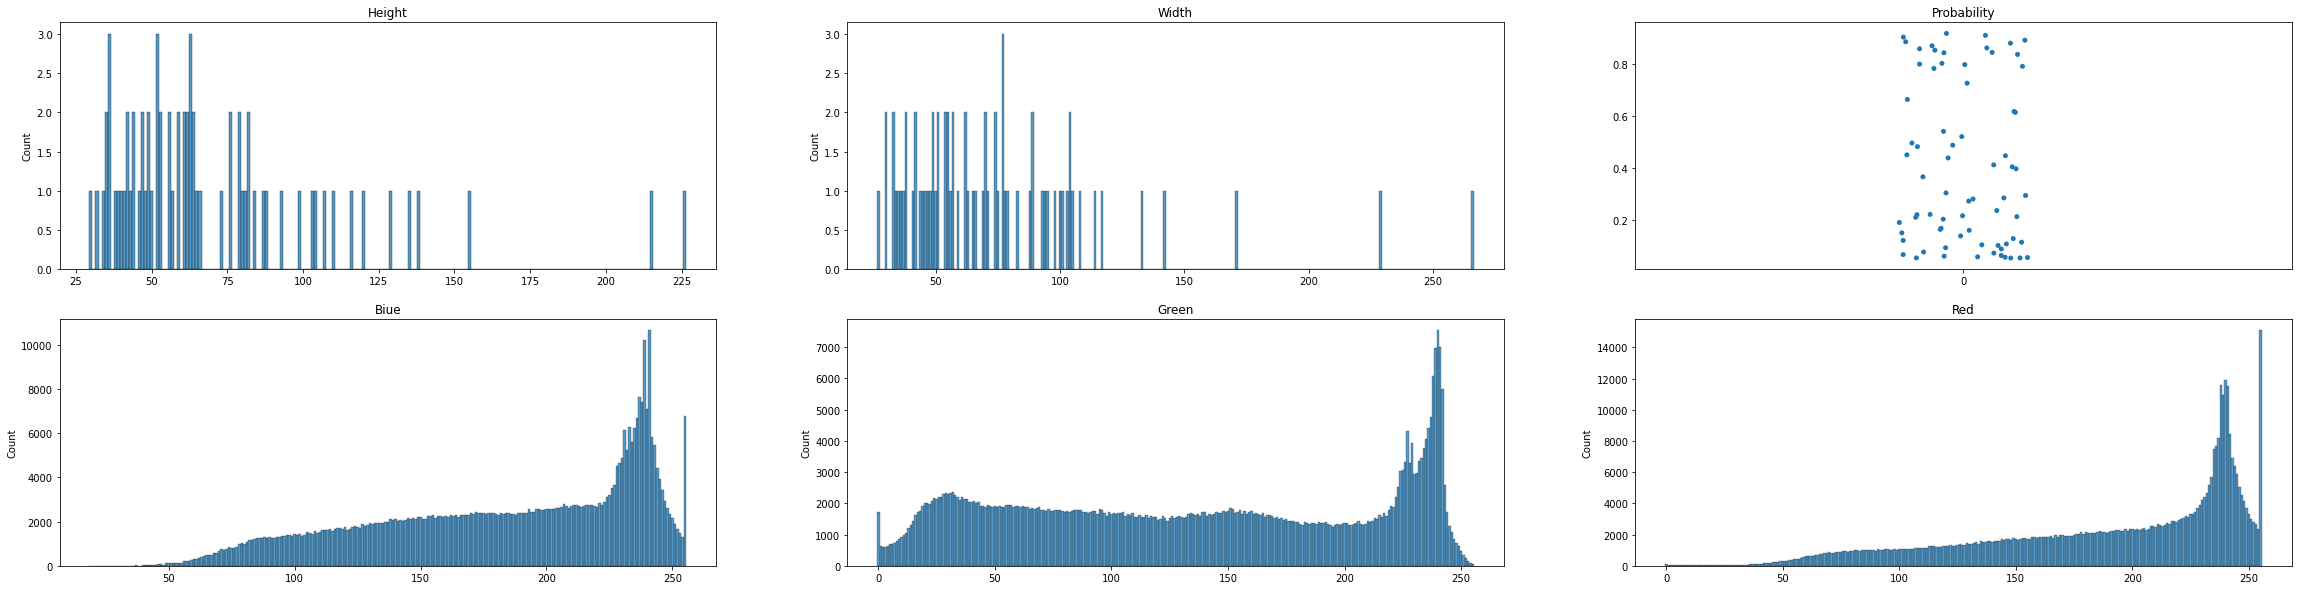

In [18]:
Statistics_P_not_G('test_for_label_augmentation')

In [20]:
def Statistics_G_not_P(test_name):
  HG = []
  WG = []
  B = []
  G = []
  R = []

  num = len(os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_G_not_P'))

  for i in os.listdir(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_G_not_P'):
    img = cv2.imread(f'/content/gdrive/MyDrive/AI競賽_運算/data/val_labeled/{test_name}_G_not_P/{i}')
    HG.append(img.shape[0])
    WG.append(img.shape[1])
    B.append(img[:,:,0].tolist())
    G.append(img[:,:,1].tolist())
    R.append(img[:,:,2].tolist())

  B = [items for item in B for items in item]
  B = [items for item in B for items in item]
  G = [items for item in G for items in item]
  G = [items for item in G for items in item]
  R = [items for item in R for items in item]
  R = [items for item in R for items in item]

  print(f'The number of G_not_P is {num}')
  fig,axes = plt.subplots(2,3,figsize=(25,10)) 
  sns.histplot(ax = axes[0,0],x=HG,discrete=True).set(title='Height')
  sns.histplot(ax = axes[0,1],x=WG,discrete=True).set(title='Width')
  sns.histplot(ax = axes[1,0],x=B,discrete=True).set(title='Biue')
  sns.histplot(ax = axes[1,1],x=G,discrete=True).set(title='Green')
  sns.histplot(ax = axes[1,2],x=R,discrete=True).set(title='Red')

The number of G_not_P is 25


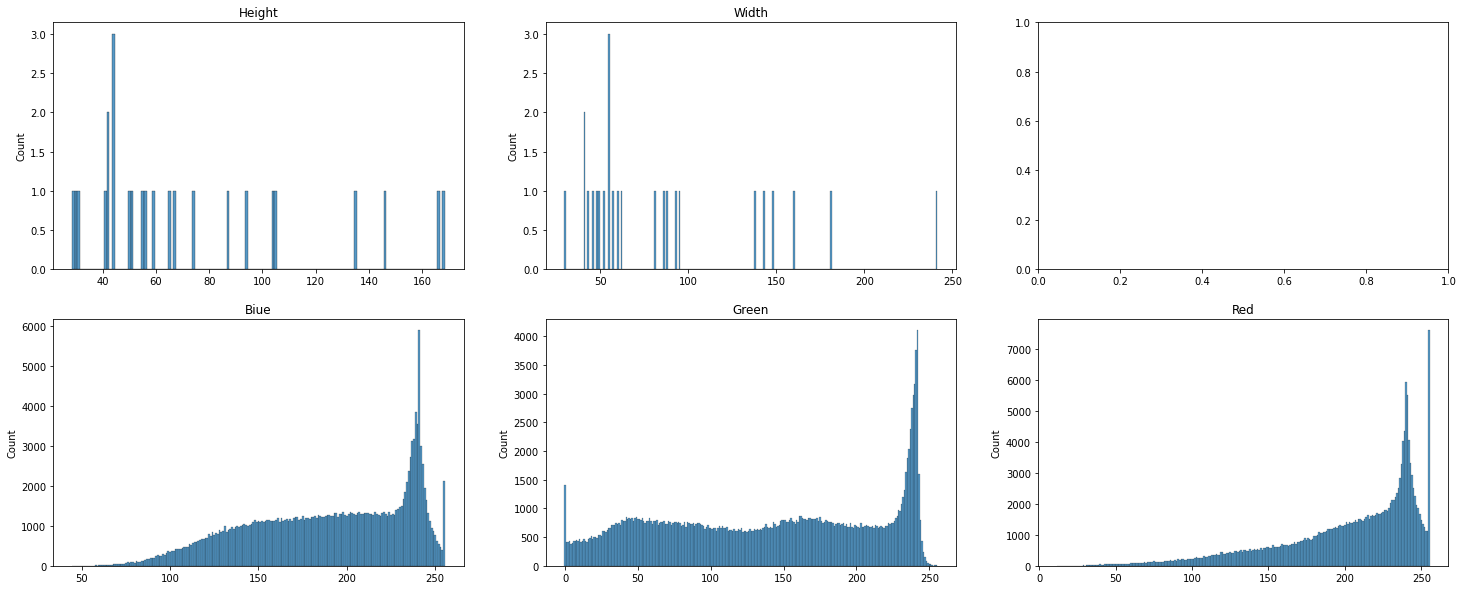

In [21]:
Statistics_G_not_P('test_for_label')

The number of G_not_P is 13


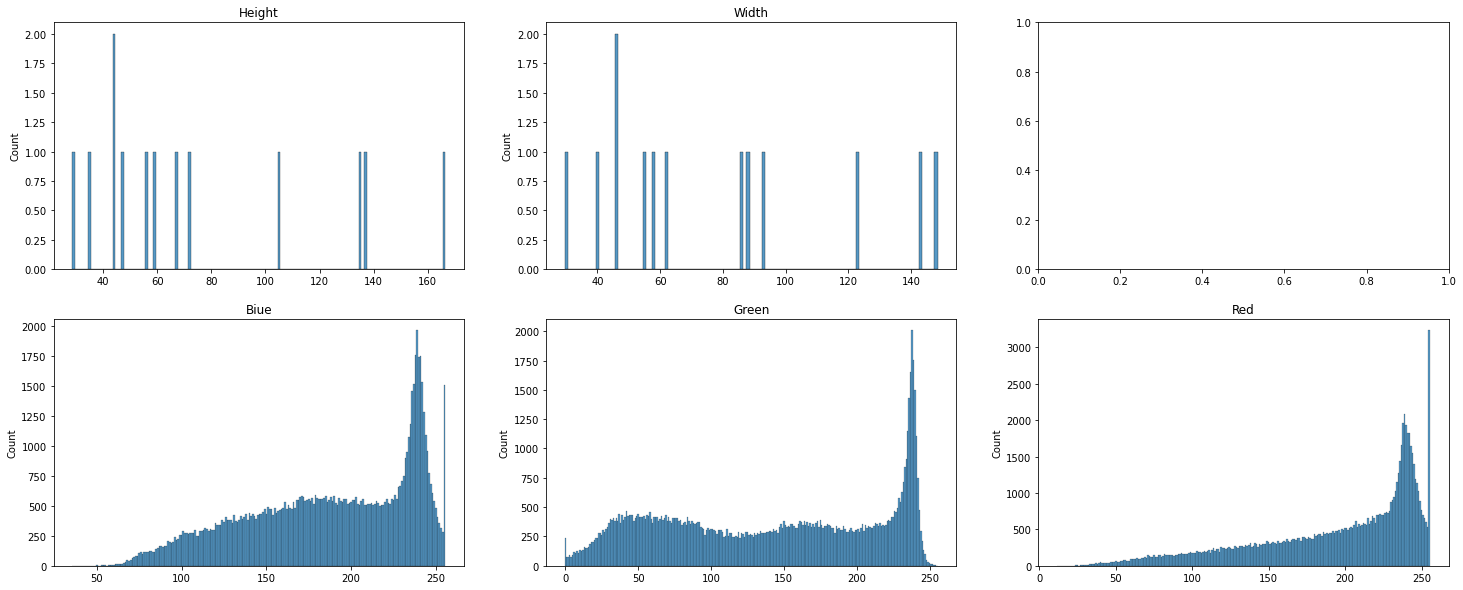

In [22]:
Statistics_G_not_P('test_for_label_augmentation')